In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline



def point_to_line_dist(point, line):
    """Calculate the distance between a point and a line segment.

    To calculate the closest distance to a line segment, we first need to check
    if the point projects onto the line segment.  If it does, then we calculate
    the orthogonal distance from the point to the line.
    If the point does not project to the line segment, we calculate the 
    distance to both endpoints and take the shortest distance.

    :param point: Numpy array of form [x,y], describing the point.
    :type point: numpy.core.multiarray.ndarray
    :param line: list of endpoint arrays of form [P1, P2]
    :type line: list of numpy.core.multiarray.ndarray
    :return: The minimum distance to a point.
    :rtype: float
    """
    # unit vector
    unit_line = np.array(line[1]) - np.array(line[0])
    norm_unit_line = unit_line / np.linalg.norm(unit_line)

    # compute the perpendicular distance to the theoretical infinite line
    segment_dist = (
        np.linalg.norm(np.cross(np.array(line[1]) - np.array(line[0]), np.array(line[0]) - np.array(point))) /
        np.linalg.norm(unit_line)
    )

    diff = (
        (norm_unit_line[0] * (point[0] - line[0][0])) + 
        (norm_unit_line[1] * (point[1] - line[0][1]))
    )

    x_seg = (norm_unit_line[0] * diff) + line[0][0]
    y_seg = (norm_unit_line[1] * diff) + line[0][1]

    endpoint_dist = min(
        np.linalg.norm(np.array(line[0]) - np.array(point)),
        np.linalg.norm(np.array(line[1]) - np.array(point))
    )

    # decide if the intersection point falls on the line segment
    lp1_x = line[0][0]  # line point 1 x
    lp1_y = line[0][1]  # line point 1 y
    lp2_x = line[1][0]  # line point 2 x
    lp2_y = line[1][1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    if is_betw_x and is_betw_y:
        return segment_dist
    else:
        # if not, then return the minimum distance to the segment endpoints
        return endpoint_dist



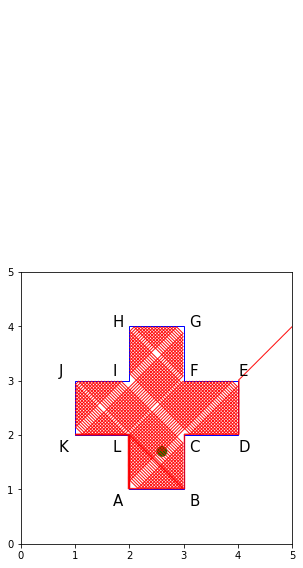

Wall time: 1min 10s


In [22]:
%%time
width = 5
height = 5

x_min=0
x_max=5
y_min=0
y_max=5


x=2.6
y=1.7

# coll=1

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')


ax1.annotate('A', (2, 1), fontsize=15, position=(1.7, 0.7))
ax1.annotate('B', (3, 1), fontsize=15, position=(3.1, 0.7))
ax1.annotate('C', (3, 2), fontsize=15, position=(3.1, 1.7))
ax1.annotate('D', (4, 2), fontsize=15, position=(4,1.7))
ax1.annotate('E', (4, 3), fontsize=15, position=(4,3.1))
ax1.annotate('F', (3, 3), fontsize=15, position=(3.1,3.1))
ax1.annotate('G', (3, 4), fontsize=15, position=(3.1,4))
ax1.annotate('H', (2, 4), fontsize=15, position=(1.7,4))
ax1.annotate('I', (2, 3), fontsize=15, position=(1.7,3.1))
ax1.annotate('J', (1, 3), fontsize=15, position=(0.7,3.1))
ax1.annotate('K', (1, 2), fontsize=15, position=(0.7,1.7))
ax1.annotate('L', (2, 2), fontsize=15, position=(1.7,1.7))

A=[2,1]
B=[3,1]
C=[3, 2]
D=[4, 2]
E=[4, 3]
F=[3, 3]
G=[3, 4]
H=[2, 4]
I=[2, 3]
J=[1, 3]
K=[1, 2]
L=[2, 2]


AB=[A,B]
BC=[B,C]
CD=[C,D]
DE=[D,E]
EF=[E,F]
FG=[F,G]
GH=[G,H]
HI=[H,I]
IJ=[I,J]
JK=[J,K]
KL=[K,L]
LA=[L,A]

X = np.array([A,B,C,D,E,F,G,H,I,J,K,L])
    
t1 = plt.Polygon(X[:12,:], edgecolor='blue', facecolor='white')
plt.gca().add_patch(t1)
  
    
ax1.add_patch(
    patches.Circle((x,y), radius=0.1, facecolor='green'))


#these below are vectors for each side, so l_a is the vector facing point A
lineAB=[B[0]-A[0],B[1]-A[1]]
lineBC=[C[0]-B[0],C[1]-B[1]]
lineCD=[D[0]-C[0],D[1]-C[1]]
lineDE=[E[0]-D[0],E[1]-D[1]]
lineEF=[F[0]-E[0],F[1]-E[1]]
lineFG=[G[0]-F[0],G[1]-F[1]]
lineGH=[H[0]-G[0],H[1]-G[1]]
lineHI=[I[0]-H[0],I[1]-H[1]]
lineIJ=[J[0]-I[0],J[1]-I[1]]
lineJK=[K[0]-J[0],K[1]-J[1]]
lineKL=[L[0]-K[0],L[1]-K[1]]
lineLA=[A[0]-L[0],A[1]-L[1]]


x_vel=0.01
y_vel=0.01

v=[x_vel,y_vel]
#these below are vectors for each side, so l_a is the vector facing point A

#if we define dx=x2-x1 and dy=y2-y1, normals are (-dy, dx) and (dy, -dx).
normalAB=[-lineAB[1],lineAB[0]]
normalBC=[-lineBC[1],lineBC[0]]
normalCD=[-lineCD[1],lineCD[0]]
normalDE=[-lineDE[1],lineDE[0]]
normalEF=[-lineEF[1],lineEF[0]]
normalFG=[-lineFG[1],lineFG[0]]
normalGH=[-lineGH[1],lineGH[0]]
normalHI=[-lineHI[1],lineHI[0]]
normalIJ=[-lineIJ[1],lineIJ[0]]
normalJK=[-lineJK[1],lineJK[0]]
normalKL=[-lineKL[1],lineKL[0]]
normalLA=[-lineLA[1],lineLA[0]]

blits=20000
dispersion=0.02

ax1.annotate('Blits : ' + str(blits), (0, 9), fontsize=20, position=(0.1, 9.6))


for i in range(0,blits):

    if point_to_line_dist([x,y], AB)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalAB))/(np.vdot(normalAB,normalAB)))),normalAB)
        x_vel=reflection[0]
        y_vel=reflection[1]   
        v=[x_vel,y_vel] 
    elif point_to_line_dist([x,y], BC)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalBC))/(np.vdot(normalBC,normalBC)))),normalBC)
        x_vel=reflection[0]
        y_vel=reflection[1]   
        v=[x_vel,y_vel] 
    elif point_to_line_dist([x,y], CD)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalCD))/(np.vdot(normalCD,normalCD)))),normalCD) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], DE)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalDE))/(np.vdot(normalDE,normalDE)))),normalDE) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], EF)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalEF))/(np.vdot(normalEF,normalEF)))),normalEF) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], FG)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalFG))/(np.vdot(normalFG,normalFG)))),normalFG) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], GH)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalGH))/(np.vdot(normalGH,normalGH)))),normalGH) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], HI)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalHI))/(np.vdot(normalHI,normalHI)))),normalHI) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], IJ)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalIJ))/(np.vdot(normalIJ,normalIJ)))),normalIJ) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], JK)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalJK))/(np.vdot(normalJK,normalJK)))),normalJK) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], KL)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalKL))/(np.vdot(normalKL,normalKL)))),normalKL) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  
    elif point_to_line_dist([x,y], LA)<dispersion :
        reflection=v - np.dot((2*((np.vdot(v,normalLA))/(np.vdot(normalLA,normalLA)))),normalLA) 
        x_vel=reflection[0]
        y_vel=reflection[1]       
        v=[x_vel,y_vel]  


    else:
        x_vel=x_vel
        y_vel=y_vel
        v=[x_vel,y_vel]
       
    x=x+x_vel
    y=y+y_vel
    ax1.add_patch(
    patches.Circle((x,y), radius=0.01, facecolor='red'))
            
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)

fig = plt.gcf()
fig.set_size_inches(5, 5)
fig.savefig('plus.png', dpi=100)
plt.show()

import winsound
duration = 200  # millisecond
freq = 440 # Hz
winsound.Beep(freq, duration)
